In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [164]:
X_train = pd.read_csv('dataset//train_X.csv')
Y_train = pd.read_csv('dataset//train_label.csv')
X_test = pd.read_csv('dataset//test_X.csv')
Y_test = pd.read_csv('dataset//test_label.csv')

In [165]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [166]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(999, 784)
(999, 10)
(349, 784)
(349, 10)


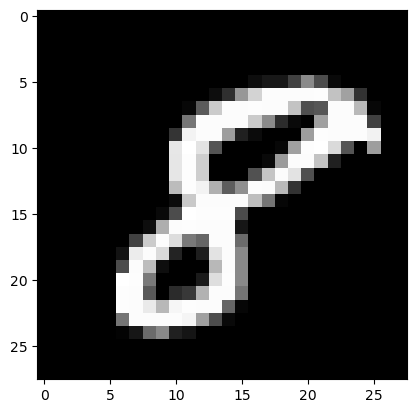

In [167]:
index = random.randint(0, X_train.shape[0])
index
plt.imshow(X_train[index, :].reshape(28,28), cmap = 'gray')

In [168]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 1, keepdims = True)

In [169]:
def derivative_tanh(x):
    return (1 -  np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array( x>0, dtype = np.float32)

In [177]:
def initial(n_x, n_h, n_y):
    w1 = np.random.randn(n_x, n_h)*0.01
    b1 = np.zeros((1,n_h))
    
    w2 = np.random.randn(n_h, n_y)*0.01
    b2 = np.zeros((1,n_y))
    return w1,b1, w2, b2

In [178]:
def forward(X, Y, w1, b1, w2, b2):
    m = X.shape[0]
    n = X.shape[1]
    

    z1 = np.dot(X, w1)+b1
    a1 = tanh(z1)
    
    z2 = np.dot(a1, w2)+b2
    a2 = softmax(z2)
    
    return z1,a1,z2,a2
    
    

In [179]:
def cost_fun(a2,y):
    m = y.shape[0]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    return cost

In [180]:
def backward_prop(X, Y,w1,b1, w2,b2, learning_rate):
    
    z1,a1,z2,a2 = forward(X, Y, w1,b1, w2,b2)
    
    cost = cost_fun(a2, Y)
    
    m = X.shape[0]
    
    dz2 = (a2-Y)   #(m, n2)
    dw2 = (1/m)*np.dot(a1.T, dz2)   #(n1, n2)
    db2 = (1/m)*np.sum(dz2, axis = 0, keepdims = True)  #(1, n2)    
    
    dz1 = (1/m)*np.dot(dz2, w2.T)*derivative_relu(a1)  #(m,n1)*(m,n1)
    dw1 = (1/m)*np.dot(X.T, dz1) #(n0, n1)
    db1 = (1/m)*np.sum(dz1, axis = 0,keepdims = True) #(1,n1)
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    return w1, b2, w2, b2, cost
    
    

In [181]:
def model(X, Y, iteration, n_h, alpha):
    n = X.shape[1]
    w1,b1, w2,b2 = initial(n, n_h, Y.shape[1])
    cost_list = []
    
    
    for i in range(iteration):
        w1, b2, w2, b2, cost = backward_prop(X, Y, w1,b1, w2,b2, alpha)
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
            
    return w1,b1, w2,b2, cost_list
    

In [184]:
iterations = 100
n_h = 1000
learning_rate = 0.02
w1,b1, w2,b2, cost_list = model(X_train, Y_train, iterations, n_h, learning_rate )

Cost after 0 iterations is : 2.2953189494078186
Cost after 10 iterations is : 1.1648507086296762
Cost after 20 iterations is : 0.819643598024087
Cost after 30 iterations is : 0.6574167476440818
Cost after 40 iterations is : 0.560369037788288
Cost after 50 iterations is : 0.4940103751664999
Cost after 60 iterations is : 0.44480960136515296
Cost after 70 iterations is : 0.40634512948095836
Cost after 80 iterations is : 0.37515682291998803
Cost after 90 iterations is : 0.3491911723943138


In [199]:
def accuracy(inp, labels, w1,b1, w2,b2):
    z1,a1,z2,a2 = forward(inp,labels, w1,b1, w2,b2)
    a_out = a2   # containes propabilities with shape(1, 10)
    print(a2.shape)
    
    a_out = np.argmax(a_out, 1)  # 1 represents row wise 
    
    labels = np.argmax(labels, 1)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [200]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, w1,b1, w2,b2), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, w1,b1, w2,b2), 2), "%")

(999, 10)
Accuracy of Train Dataset 94.29429429429429 %
(349, 10)
Accuracy of Test Dataset 85.39 %


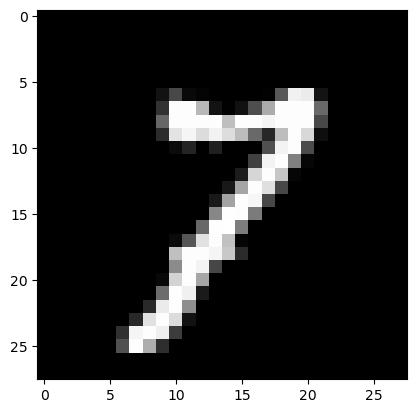

(784,)
Our model says it is : 7


In [219]:
idx = int(random.randrange(0,X_test.shape[0]))
plt.imshow(X_test[idx,:].reshape((28,28)),cmap='gray')
plt.show()
print(X_test[idx, :].shape)
z1,a1,z2,a2 = forward( X_test[idx, :].reshape(1, X_test[idx,:].shape[0]),Y_test, w1,b1, w2,b2)
a_pred = a2  
a_pred = np.argmax(a_pred, 1)

print("Our model says it is :", a_pred[0])